In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start_date1 = '2020-01-01'
end_date1 = '2025-08-31'

ticker = 'AVGO'

data1 = yf.download(ticker, start_date1, end_date1, group_by=ticker, auto_adjust=False)[ticker]
data1.tail()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-08-25,292.809998,298.399994,291.709991,294.230011,293.726746,15124700
2025-08-26,294.350006,300.250000,293.989990,298.010010,297.500275,25689100
2025-08-27,297.529999,301.179993,293.779999,300.250000,299.736450,13830300
2025-08-28,302.929993,311.000000,302.329987,308.649994,308.122070,18907100
2025-08-29,307.010010,307.010010,293.660004,297.390015,296.881348,21610700


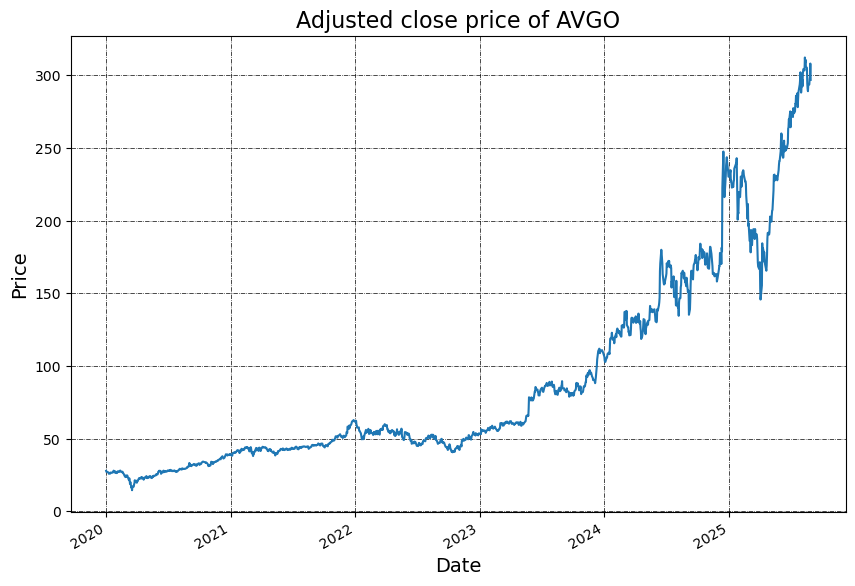

In [3]:
data1['Adj Close'].plot(figsize=(10, 7))
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title(f'Adjusted close price of {ticker}', fontsize=16)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [4]:
ticker_list = ['CRDO', 'ALAB', 'CLS', 'ENTG', 'AMKR', 'TSEM']

data2 = pd.DataFrame(columns=ticker_list)

for ticker in ticker_list:
    data2[ticker] = yf.download(ticker, period='1y', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


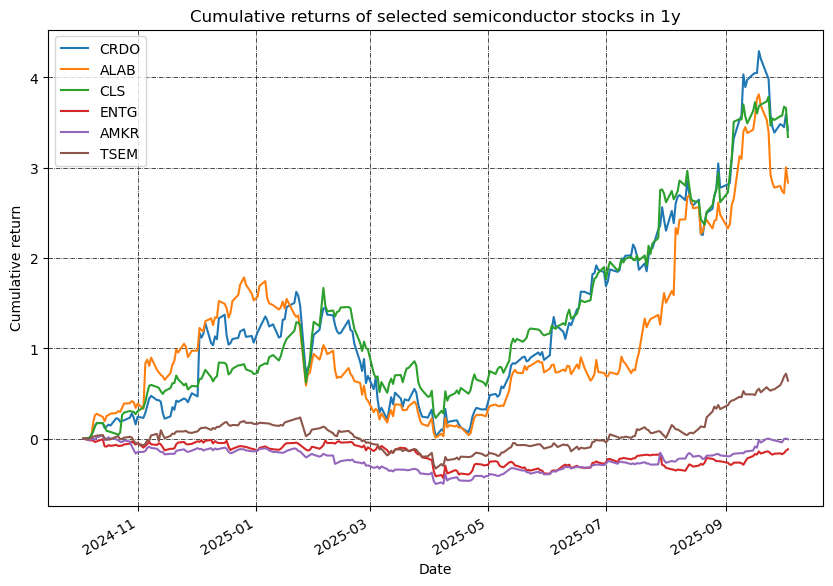

In [5]:
cum_retn = (data2 / data2.iloc[0]) - 1
cum_retn.plot(figsize=(10, 7))

plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title('Cumulative returns of selected semiconductor stocks in 1y')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [6]:
daily_retn = data2.pct_change() #day_retn = (data2 / data2.shift(1)) - 1
daily_retn = daily_retn.dropna()

correlation_matrix = daily_retn.corr() #compute correlation
correlation_matrix

,CRDO,ALAB,CLS,ENTG,AMKR,TSEM
CRDO,1.000000,0.655550,0.669961,0.405071,0.465189,0.550076
ALAB,0.655550,1.000000,0.576806,0.386212,0.439430,0.475524
CLS,0.669961,0.576806,1.000000,0.453650,0.589992,0.572424
ENTG,0.405071,0.386212,0.453650,1.000000,0.747947,0.518904
AMKR,0.465189,0.439430,0.589992,0.747947,1.000000,0.555905
TSEM,0.550076,0.475524,0.572424,0.518904,0.555905,1.000000


[*********************100%***********************]  6 of 6 completed


Ticker          ALAB      AMKR       CLS      CRDO      ENTG      TSEM
Date                                                                  
2024-03-21  0.034177  0.001898  0.068104  0.045455  0.027550  0.002404
2024-03-22  0.091192 -0.000632 -0.000425  0.017114  0.001067 -0.011691
2024-03-25  0.214286  0.006951 -0.014671  0.014552  0.008383 -0.001820
2024-03-26 -0.019059 -0.009727  0.000647 -0.029135 -0.011554 -0.005773
2024-03-27 -0.041497  0.037072 -0.017468 -0.021237  0.004918  0.008252


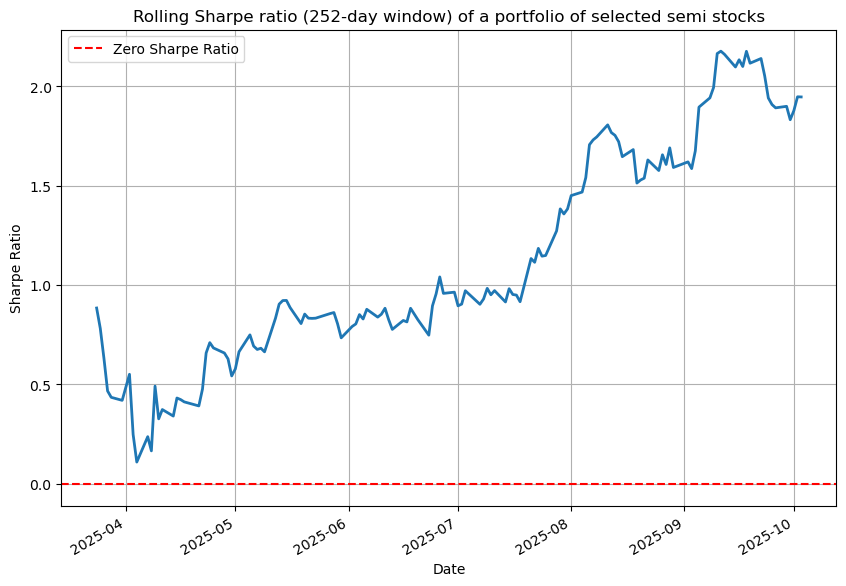

In [7]:
ticker_list = ['CRDO', 'ALAB', 'CLS', 'ENTG', 'AMKR', 'TSEM']

data3 = yf.download(ticker_list,  period='2y', auto_adjust=False)['Adj Close']

returns = data3.pct_change().dropna()
print(returns.head())

weights = np.array([0.2, 0.15, 0.15, 0.2, 0.15, 0.15])  # example portfolio weights

portfolio_returns = returns.dot(weights)

# Get the (1 year) risk-free interest rate from FRED (Federal Reserve Economic Data) 
import pandas_datareader as pdr
rf_rate_list = pdr.DataReader('DGS1', 'fred')
rf_rate = rf_rate_list['DGS1'].iloc[-1]/100

window_size = 252  # 1-year rolling window
risk_free_rate_annual = rf_rate 
risk_free_rate_daily = risk_free_rate_annual / 252

# Compute rolling Sharpe ratio
rolling_mean = portfolio_returns.rolling(window=window_size).mean()
rolling_std = portfolio_returns.rolling(window=window_size).std()

rolling_sharpe_ratio = (rolling_mean * 252 - risk_free_rate_annual) / (rolling_std * np.sqrt(252))



plt.figure(figsize=(10, 7))
rolling_sharpe_ratio.plot(lw=2)
plt.title(f'Rolling Sharpe ratio ({window_size}-day window) of a portfolio of selected semi stocks')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Sharpe Ratio')
plt.legend()
plt.ylabel("Sharpe Ratio")
plt.xlabel("Date")
plt.grid(True)
plt.show()